## This notebook produces a Report of Vibration Points (PV) for especific Julian Days (JD) Folders ##

1. Create a (TR) Trace Report per JD
2. Create a (PV) Report per JD

A Julian Day in general includes 3 real days of seismic acquisiton, but maybe more or less days, its number is related to the day when the HDRs were collected and TRANSCRIBED to segys

Every JD has a folder with several segy files, every segy corresponds to a HDR station.

To create the Trace Report (TR) this notebook reads RDS segy station file (HDR station).

   **All report files are created on the same directory**



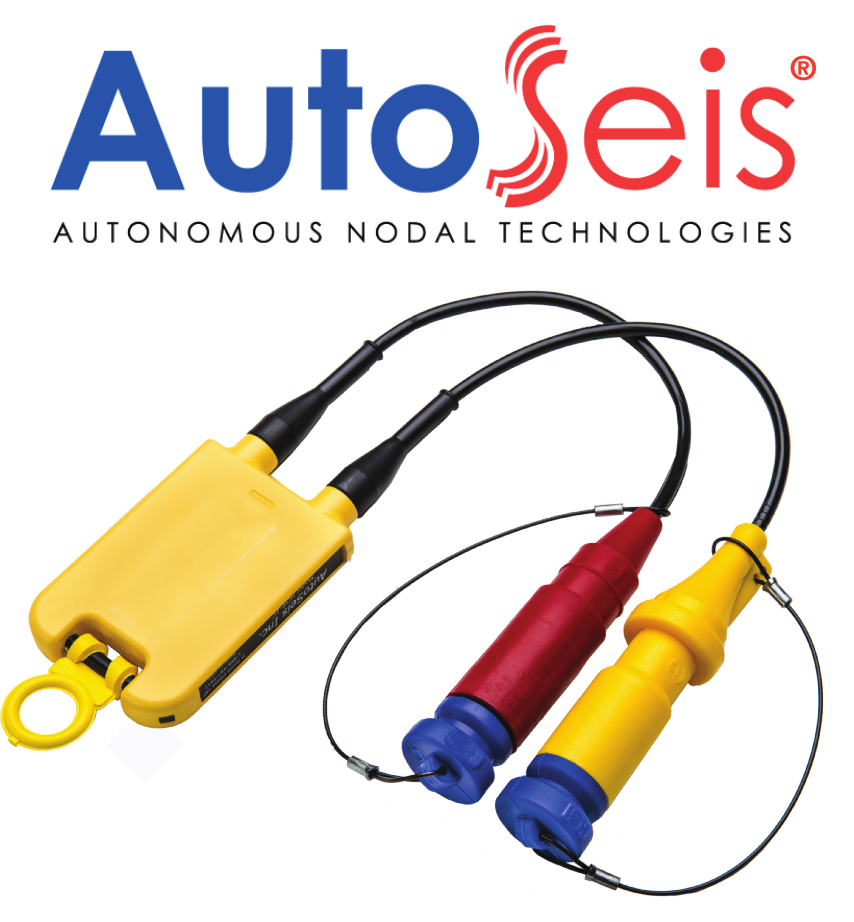

In [1]:
from IPython.display import Image
Image(filename='/home/andre/Pictures/autoseis.png', width=300)

In [3]:
ls

 O volume na unidade Y nÆo tem nome.
 O N£mero de S‚rie do Volume ‚ B002-0F5D

 Pasta de Y:\GLOBAL_HD6\JD_085

26/10/2015  18:13    <DIR>          .
20/06/2015  01:51    <DIR>          ..
26/10/2015  18:13             3.726 JD_85_ST_RELATIONAL.txt
19/06/2015  17:10    <DIR>          SEGY
19/06/2015  17:10    <DIR>          SEGY_LOG
               1 arquivo(s)          3.726 bytes
               4 pasta(s)   1.314.979.278.848 bytes dispon¡veis


##Creates TR Trace Report files for all JD folder that contains a station relational file ##

## TRACE REPORT ##

TR (Trace Report) file

The trace Report is a pure text file containing for each station and each trace on the segy files previous readed
the vibration point related. 

"Station Number" "PV Number"

    16892 16155
    16892 16161
    16892 16159
    16892 16165
    ...
    16972 16155
    16972 16161
    16972 16163
    16972 16169  


In [12]:
%%time

import glob
import os

# address where the JD and relational files are
relationals = glob.glob('Linha_16*txt') # all relational files with prefix Linha_16

for relational_file in relationals: # for every (station, relational) Julian Day file
    f = open(relational_file,'r') # read the relation station and relational number
    stations = f.readlines()
    f.close()
    #station, relational_rds =  stations[0].strip().split('\t') # split it
    #print (station, relational_rds)    
    JD = ''
    try:        
        JD = relational_file.split('.')[0].split('_')[-1]
        os.chdir(glob.glob('*'+JD)[0])    
        os.chdir('SEGY')    
    except:
        # continue to the next file
        continue
        
    from obspy.segy import segy

    f = open('..\\..\\JD_'+ JD +'_TR.txt','w')  # the trace header Report File 
    # every trace produces a pair
    # station, pv
    i=0
    n = len(stations)

    for station in stations: # station and station relational number (segy file)
        try:
            station, relational_rds =  station.strip().split('\t')
            sgyfilename = glob.glob('*'+relational_rds.strip()+'*')[0] # find the proper sgy file in this folder
            print("file is ", sgyfilename, " : %.1f"%(100.0*i/n))          
        except:
            print ("Warn: couldn't find station relation segy ", relational_rds.strip())
            i = i + 1
            continue    
        i = i + 1
        try:
            sgy = segy.readSEGY(sgyfilename, headonly=True, unpack_headers=True)  # just headers read    
            pvbefore = 0
            for trc in sgy.traces: # for every trace                
                if trc.header.trace_value_measurement_unit != pvbefore: # avoid printing 3 sweeps, print just one
                    pvbefore = trc.header.trace_value_measurement_unit
                    f.write(station+' '+str(pvbefore)+'\n')
        except Exception as inst: 
            print (inst)
            print ("Error: couldn't read relation segy ", relational_rds.strip())
            continue    
    f.close()    
    os.chdir('..') 
    os.chdir('..') 

file is  rds_10072537_4_2014-03-26_18-25-48_001.sgy  : 0.0
file is  rds_10117606_4_2014-03-26_18-25-48_001.sgy  : 0.4
file is  rds_10073207_4_2014-03-26_18-25-48_001.sgy  : 0.9
file is  rds_10022958_4_2014-03-26_18-25-48_001.sgy  : 1.3
file is  rds_10014924_4_2014-03-26_18-25-48_001.sgy  : 1.7
file is  rds_10112339_4_2014-03-26_18-25-48_001.sgy  : 2.1
file is  rds_10072607_4_2014-03-26_18-25-48_001.sgy  : 2.6
file is  rds_10111183_4_2014-03-26_18-25-48_001.sgy  : 3.0
file is  rds_10072891_4_2014-03-26_18-25-48_001.sgy  : 3.4
file is  rds_10120644_4_2014-03-26_18-25-48_001.sgy  : 3.9
file is  rds_10112241_4_2014-03-26_18-25-48_001.sgy  : 4.3
file is  rds_10072503_4_2014-03-26_18-25-48_001.sgy  : 4.7
file is  rds_10016489_4_2014-03-26_18-25-48_001.sgy  : 5.2
file is  rds_10122475_4_2014-03-26_18-25-48_001.sgy  : 5.6
file is  rds_10118060_4_2014-03-26_18-25-48_001.sgy  : 6.0
file is  rds_10073293_4_2014-03-26_18-25-48_001.sgy  : 6.4
file is  rds_10116716_4_2014-03-26_18-25-48_001.sgy  : 6

## PV REPORT ##

**From here on this notebook reads the TR (Trace Report) file created above and generates PV Report**

** TR files must have suffix '_TR' with 'JD number' as prefix, like 155_TR.txt**

Here is created a file suffixed *PV_REPORT* from each TR (Trace Report) File.
The file contains a PV Report like bellow

"PV Number" "First Station Alive" "Last Station Alive" "Number of Recorded Stations" "Number of Valid Stations Based on Geometry" 

    15613 17011 17011 1 560
    15619 17011 17011 1 560
    15621 17011 17011 1 560
    ...
    17273 16942 17061 103 491
    17275 16942 17061 104 493
    17277 16962 17061 100 495
    
To make sense and avoid problems of PV's recorded for stations gathered in different JDs we
also create a concatenated version for all JD.

Trace Report file and its PV_REPORT version 

To create a final report for all JDs in a sequence.

In [12]:
# address where the TR files are
%cd C:\Users\alferreira.ANP.000\Desktop\HDs GLOBAL\Linha 10

C:\Users\alferreira.ANP.000\Desktop\HDs GLOBAL\Linha 10


In [23]:
# first create a concatenated TR file with all
import glob
import os
import pandas as pd
import pandas
import numpy as np

# Windows!
os.system("erase all_TR.txt")  # Linux os.system("rm all_TR.txt")
tr_files = glob.glob('*_TR.txt') # all trace report files each one for a JD
concat_tr_files = 'type ' # Linux 'cat '
for tr_file in tr_files:
    concat_tr_files += ' '+tr_file
concat_tr_files += '> JD_all_TR.txt' 
os.system(concat_tr_files)

tr_files = glob.glob('*_TR.txt') # all trace report files each one for a JD

for tr_file in tr_files: # for every trace report file create a PV_REPORT
    JD = tr_file.split('_TR')[0]
    st_pv = pandas.read_csv(tr_file, sep=' ', names=["station", "pv"])
    pv_st = st_pv.sort(columns="pv")
    pv_grouped = pv_st.groupby(by=["pv"])
    
    f = open(JD+'_PV_REPORT.txt','w') # the PV header report 

    for gp in pv_grouped: # for every pv group of stations
        pv = gp[0] # get the pv number
        stations = gp[1] # get all the stations
        first_st = stations.station.min() # first station
        last_st = stations.station.max() # last station
        # full range of recorded statations to see if is there any missing station
        range_rec = list(range(first_st, last_st+1)) 
        # how many missing based on acquisition geometry
        fst = pv - 280 # expected first station
        lst = pv + 280 # expected last station
        range_geometry = list(range(fst, lst+1))
        range_geometry.remove(pv) # split spread does not record on the vibration point
        # get how many stations recorded this pv on geometry range
        missing = 560 - abs(np.intersect1d(stations.station.values, pd.Series(range_geometry)).size)
        # get how many stations recorded this pv even if outside geometry    
        nrec = np.intersect1d(stations.station.values, pd.Series(range_rec)).size         
        f.write(str(pv)+' '+str(first_st)+' '+str(last_st)+' '+str(nrec)+' '+str(missing)+'\n')    
    f.close()    

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:22: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [101]:
#print (stations.station.values)
#print (pv + 280)
#print (list(range(fst, lst+1)[-3:]))
#print (missing)

## Final PV REPORT PLOT##

Here we plot the final report of PVs through Julian Days

These graphs can also be done in excel from the *JD*_PV_REPORT* files

To make meaningfull plots we use the concatenated version of a sequences of JDs.

In [24]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [25]:
import numpy
# concatenated version of all JD
pv_st_all = numpy.loadtxt('all_PV_REPORT.txt', delimiter=' ')

In [26]:
#***Checking if is there any fully missing pv's***
# PV range on the JD 84 to 78
#print pv_st_77_85R[:,0].min()
#print pv_st_77_85R[:,0].max()
#print arange(15613, 22957+2, 2)[-3:]
#print pv_st_77_85R[-3:,0]
#pv_st_77_85R[:,0].size - np.intersect1d(pv_st_77_85R[:,0], arange(15613, 22957, 2)).size

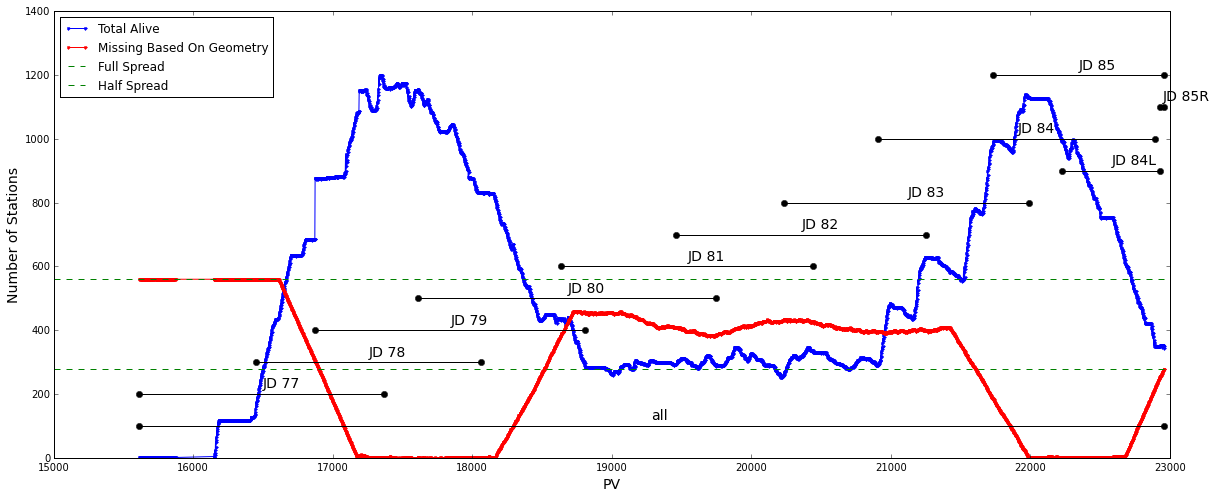

In [27]:
fig = plt.figure(figsize=(20,8), dpi=250)
ax = fig.add_subplot(111)
alive, = ax.plot(pv_st_all[:,0], pv_st_all[:,3], '.-b')
missing, = ax.plot(pv_st_all[:,0], pv_st_all[:,4], '.-r')
fullspread, = ax.plot(ax.get_xlim(), [560, 560], '--g')
halfspread, = ax.plot(ax.get_xlim(), [280, 280], '--g')
legend([alive, missing, fullspread, halfspread], ["Total Alive", "Missing Based On Geometry", "Full Spread", "Half Spread"], loc='upper left')

ax.set_ylabel('Number of Stations', fontsize=14)
ax.set_xlabel('PV', fontsize=14)
# get the range of PVs in each Julian Day
import numpy as np

pvr_files = glob.glob('*PV_REPORT.txt') # all trace report files each one for a JD
pvr_files.remove('JD_all_PV_REPORT.txt')

i = 0
y = np.array([0, 0])
for pvr_file in pvr_files:
    pv_st = numpy.loadtxt(pvr_file, delimiter=' ')
    labelPV = pvr_file.split('_PV_')[0]
    firstPV = pv_st[0,0]
    lastPV = pv_st[-1,0]       
    x = np.array([firstPV, lastPV])
    y += 100
    ax.plot(x, y, '-k')
    ax.plot(x, y, 'ok')
    ax.text(x.sum()/2, y[0]+20, labelPV.replace('_',' '), fontsize=14)
    i += 1
    
fig.savefig('PVReport.png', dpi=300)